<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [10]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [11]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-01-11 12:17:10--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  53.7MB/s    in 2.8s    

2025-01-11 12:17:13 (53.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


In [12]:
df['SOPartFreq'].value_counts()

SOPartFreq
Less than once per month or monthly                   24162
I have never participated in Q&A on Stack Overflow    11143
A few times per month or weekly                        6277
A few times per week                                   2278
Daily or almost daily                                   936
Multiple times per day                                  441
Name: count, dtype: int64

In [13]:
conn = sqlite3.connect('survey-data.sqlite')

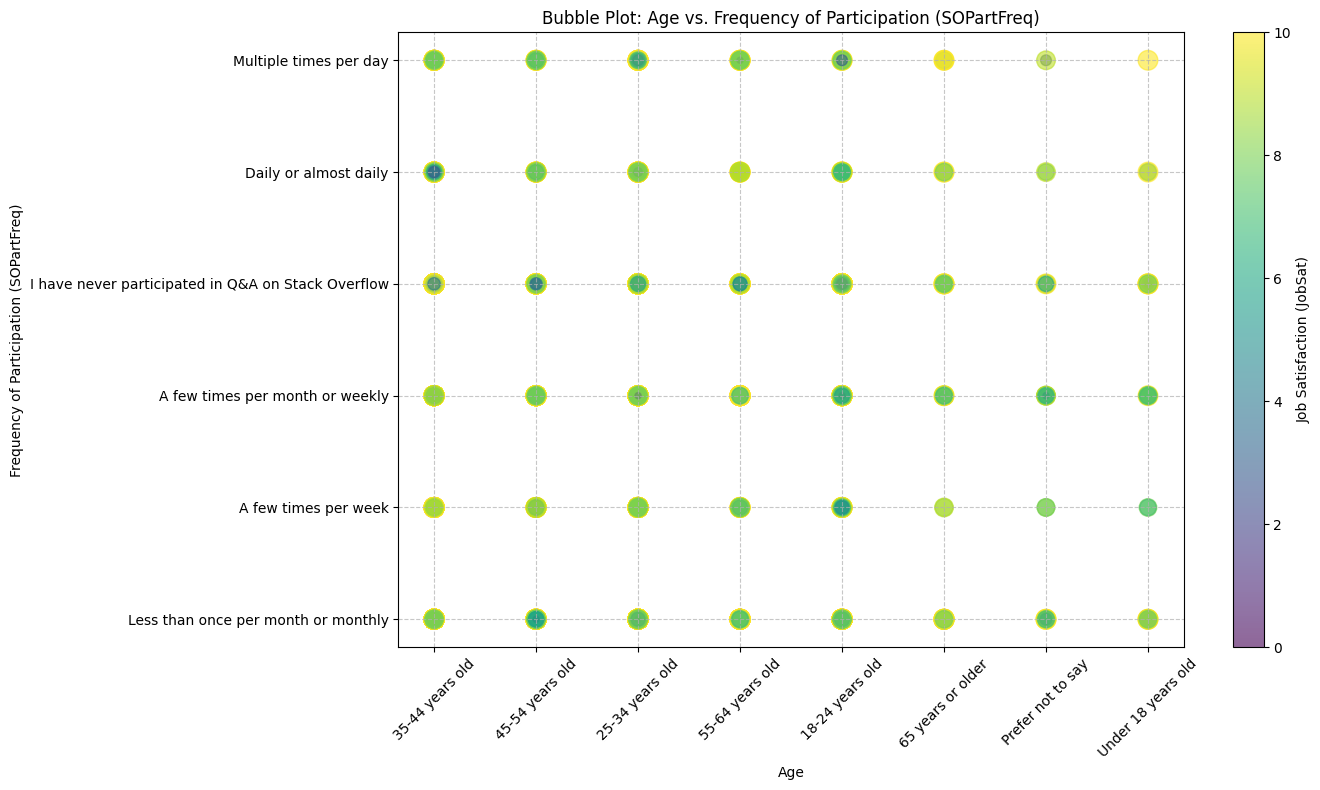

In [14]:
##Write your code here
# Query the data
query = """
SELECT Age, SOPartFreq, JobSat
FROM main
WHERE Age IS NOT NULL AND SOPartFreq IS NOT NULL AND JobSat IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Clean data: Remove rows with NaN values
df_cleaned = df.dropna(subset=['Age', 'SOPartFreq', 'JobSat'])

# Plot the bubble plot
plt.figure(figsize=(14, 8))
bubble = plt.scatter(
    x=df_cleaned['Age'],
    y=df_cleaned['SOPartFreq'],
    s=df_cleaned['JobSat'] * 20,  # Scale bubble sizes by JobSat values
    alpha=0.6,
    c=df_cleaned['JobSat'],  # Use JobSat values for color intensity
    cmap='viridis'
)

# Add a color bar for JobSat
plt.colorbar(bubble, label='Job Satisfaction (JobSat)')

# Customize plot
plt.title('Bubble Plot: Age vs. Frequency of Participation (SOPartFreq)')
plt.xlabel('Age')
plt.ylabel('Frequency of Participation (SOPartFreq)')
plt.xticks(rotation=45)  # Rotate x-axis labels if age values are long
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


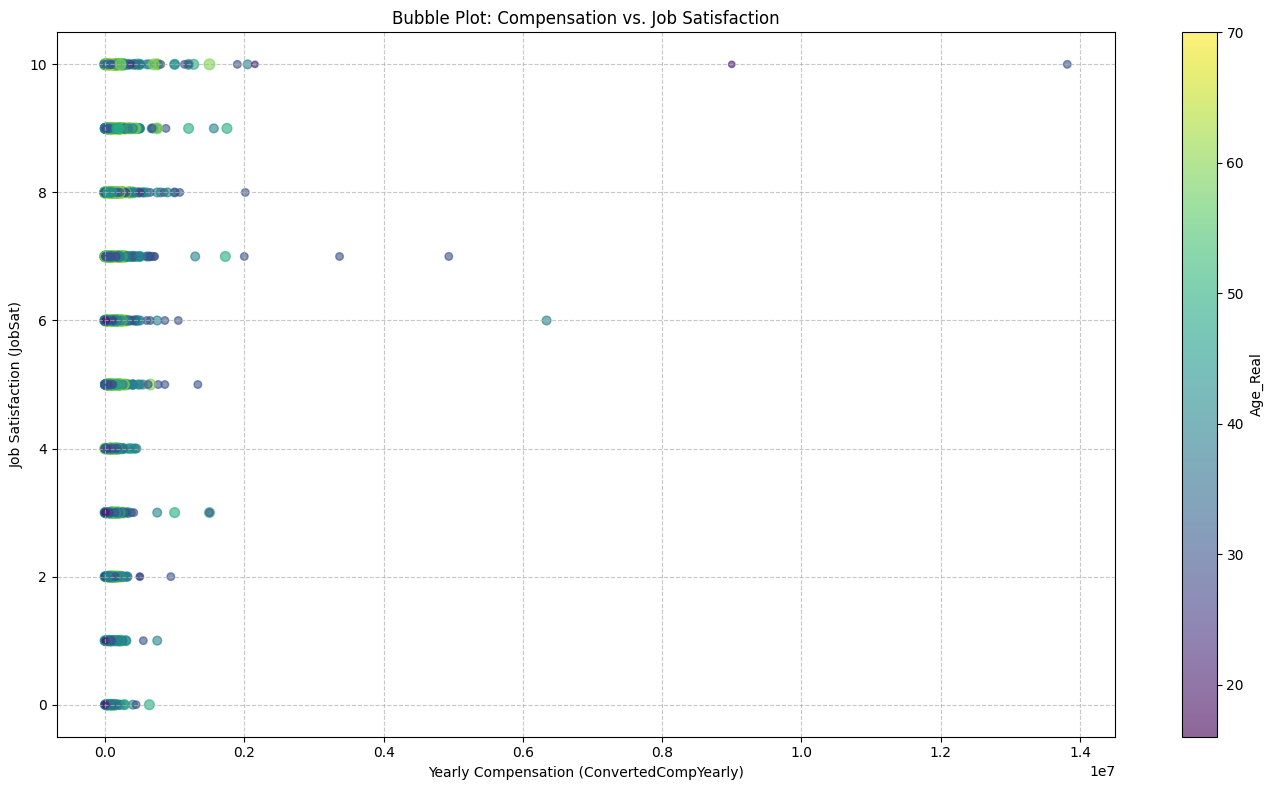

In [15]:
##Write your code here
# Query the data
query = """
SELECT ConvertedCompYearly, JobSat, Age_Real
FROM main
WHERE ConvertedCompYearly IS NOT NULL AND JobSat IS NOT NULL AND Age_Real IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Remove rows with NaN or invalid values
df_cleaned = df.dropna(subset=['ConvertedCompYearly', 'JobSat', 'Age_Real'])

# Plot the bubble plot
plt.figure(figsize=(14, 8))
bubble = plt.scatter(
    x=df_cleaned['ConvertedCompYearly'],
    y=df_cleaned['JobSat'],
    s=df_cleaned['Age_Real'],  # Bubble size represents Age
    alpha=0.6,
    c=df_cleaned['Age_Real'],  # Bubble color represents Age
    cmap='viridis'
)

# Add a color bar for Age
plt.colorbar(bubble, label='Age_Real')

# Customize plot
plt.title('Bubble Plot: Compensation vs. Job Satisfaction')
plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction (JobSat)')
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



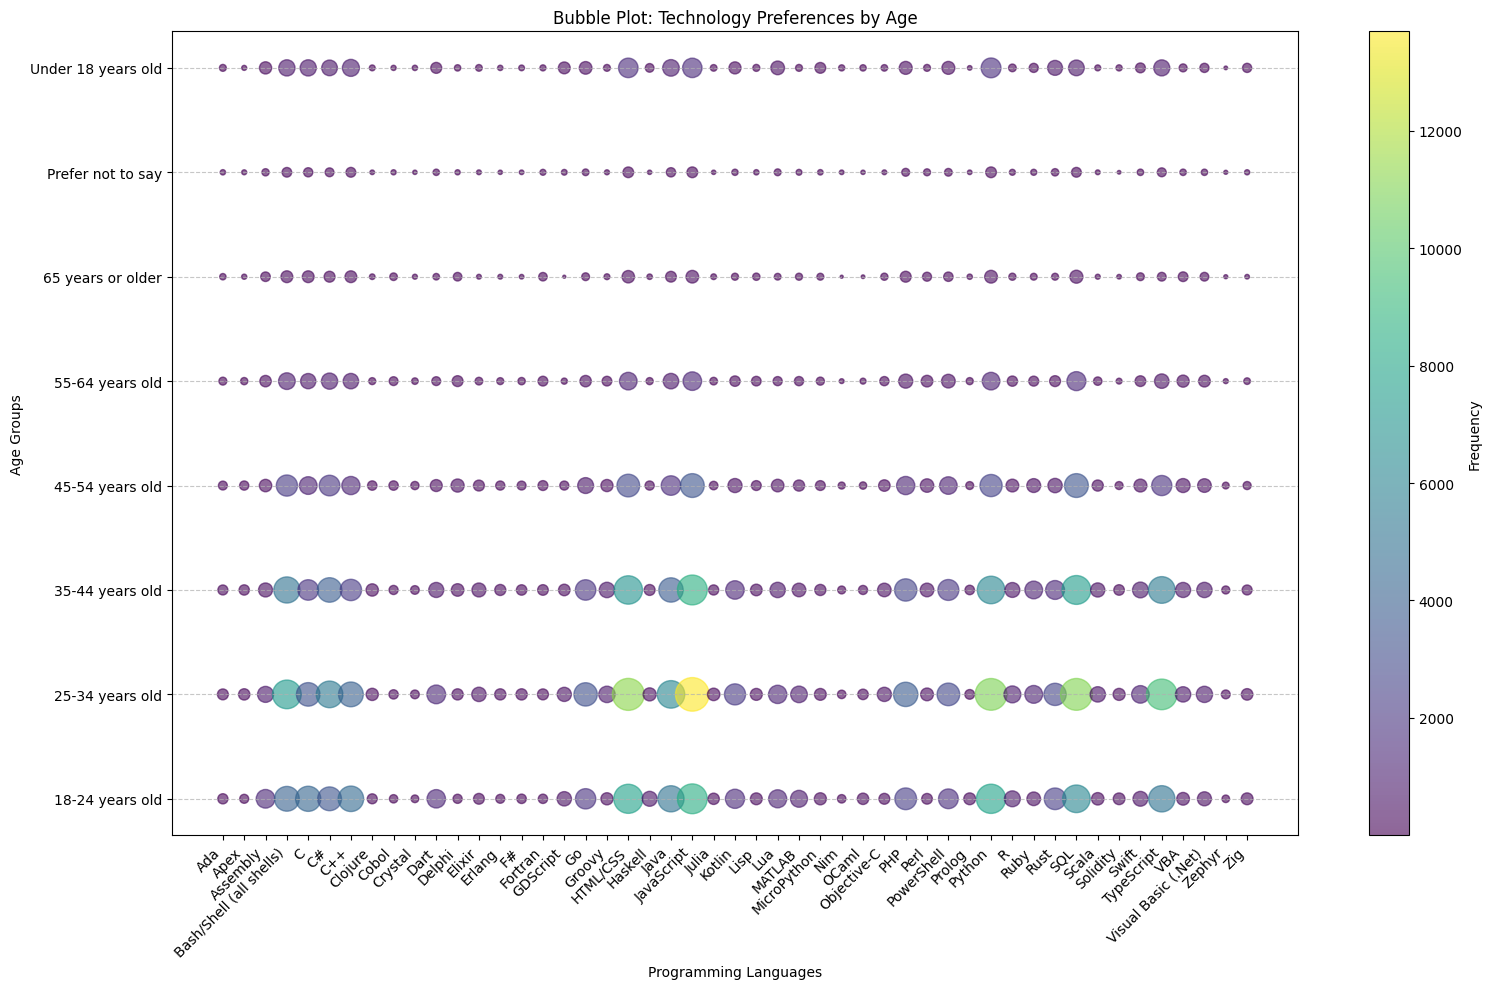

In [16]:
##Write your code here
import numpy as np
# Query the data
query = """
SELECT LanguageHaveWorkedWith, Age
FROM main
WHERE LanguageHaveWorkedWith IS NOT NULL AND Age IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Split the 'LanguageHaveWorkedWith' column into individual languages
df_expanded = df.assign(LanguageHaveWorkedWith=df['LanguageHaveWorkedWith'].str.split(';')).explode('LanguageHaveWorkedWith')

# Group the data by Age and LanguageHaveWorkedWith, and calculate frequencies
grouped = df_expanded.groupby(['Age', 'LanguageHaveWorkedWith']).size().reset_index(name='Frequency')

# Normalize bubble sizes using square root scaling
grouped['ScaledFrequency'] = np.sqrt(grouped['Frequency']) * 5  # Adjust multiplier as needed

# Create the bubble plot
plt.figure(figsize=(16, 10))

bubble = plt.scatter(
    x=grouped['LanguageHaveWorkedWith'],
    y=grouped['Age'],
    s=grouped['ScaledFrequency'],  # Use normalized sizes
    alpha=0.6,
    c=grouped['Frequency'],  # Color by original frequency
    cmap='viridis'
)

# Add color bar
plt.colorbar(bubble, label='Frequency')

# Customize plot
plt.title('Bubble Plot: Technology Preferences by Age')
plt.xlabel('Programming Languages')
plt.ylabel('Age Groups')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to avoid clipping
plt.tight_layout()

# Show plot
plt.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


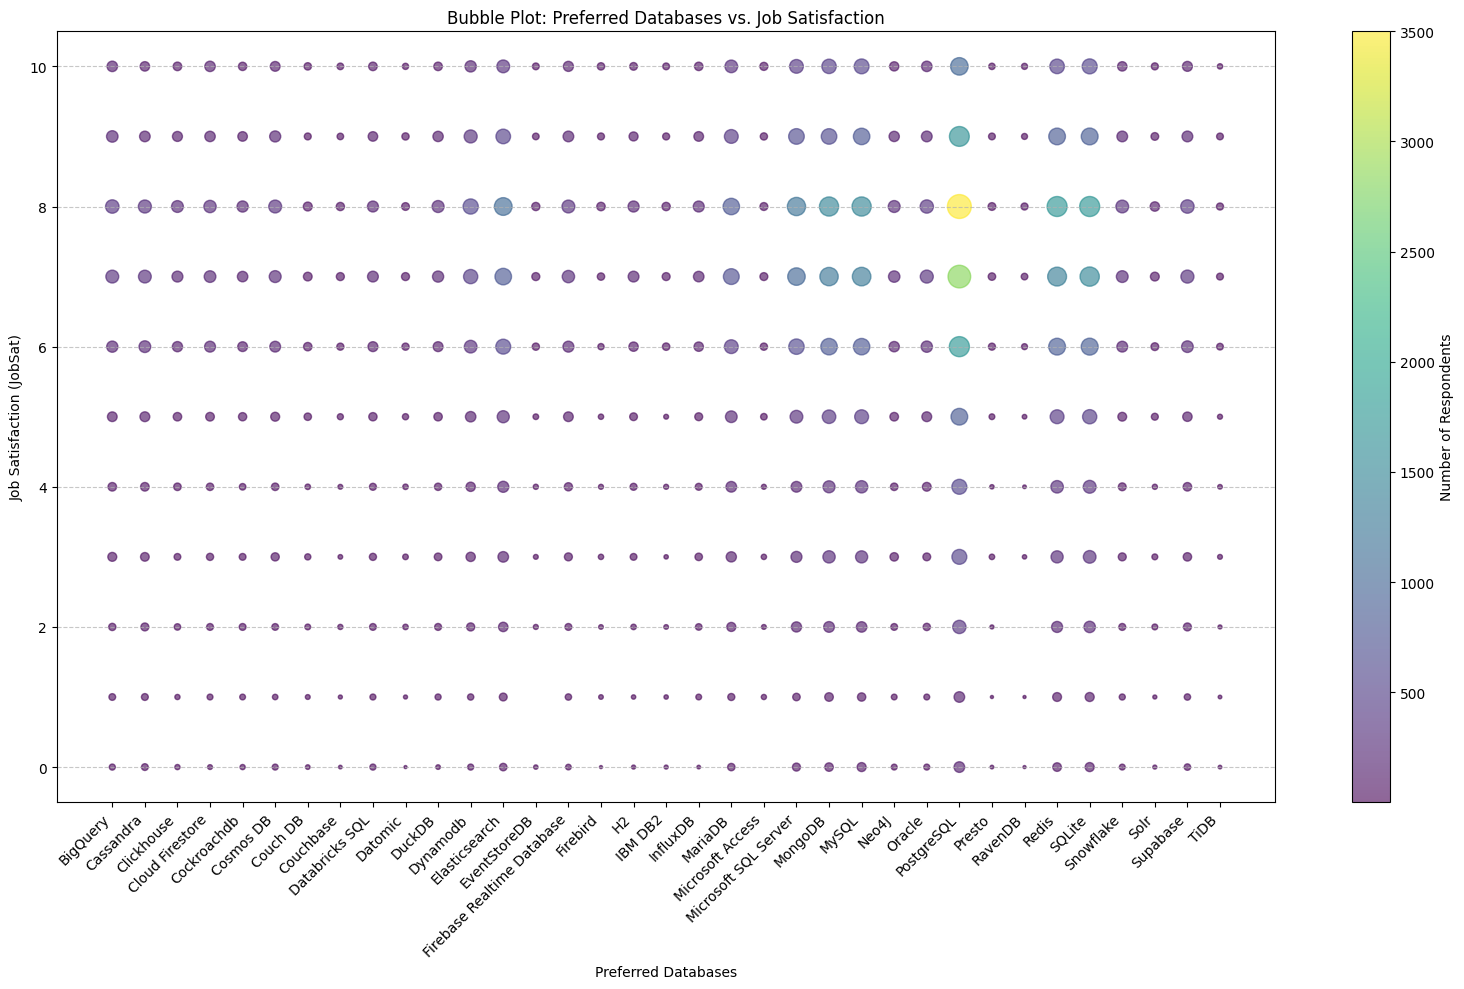

In [17]:
##Write your code here
# Query the data
query = """
SELECT DatabaseWantToWorkWith, JobSat
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL AND JobSat IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Split 'DatabaseWantToWorkWith' into individual databases
df_expanded = df.assign(DatabaseWantToWorkWith=df['DatabaseWantToWorkWith'].str.split(';')).explode('DatabaseWantToWorkWith')

# Group the data by Database and JobSat, and calculate the number of respondents
grouped = df_expanded.groupby(['DatabaseWantToWorkWith', 'JobSat']).size().reset_index(name='Frequency')

# Normalize or scale the frequency for bubble sizes (optional)
grouped['ScaledFrequency'] = np.sqrt(grouped['Frequency']) * 5  # Square root scaling for bubble size

# Create the bubble plot
plt.figure(figsize=(16, 10))

bubble = plt.scatter(
    x=grouped['DatabaseWantToWorkWith'],
    y=grouped['JobSat'],
    s=grouped['ScaledFrequency'],  # Size of the bubble based on scaled frequency
    alpha=0.6,
    c=grouped['Frequency'],  # Color by frequency
    cmap='viridis'
)

# Add color bar for frequency
plt.colorbar(bubble, label='Number of Respondents')

# Customize plot
plt.title('Bubble Plot: Preferred Databases vs. Job Satisfaction')
plt.xlabel('Preferred Databases')
plt.ylabel('Job Satisfaction (JobSat)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to avoid clipping
plt.tight_layout()

# Show plot
plt.show()


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


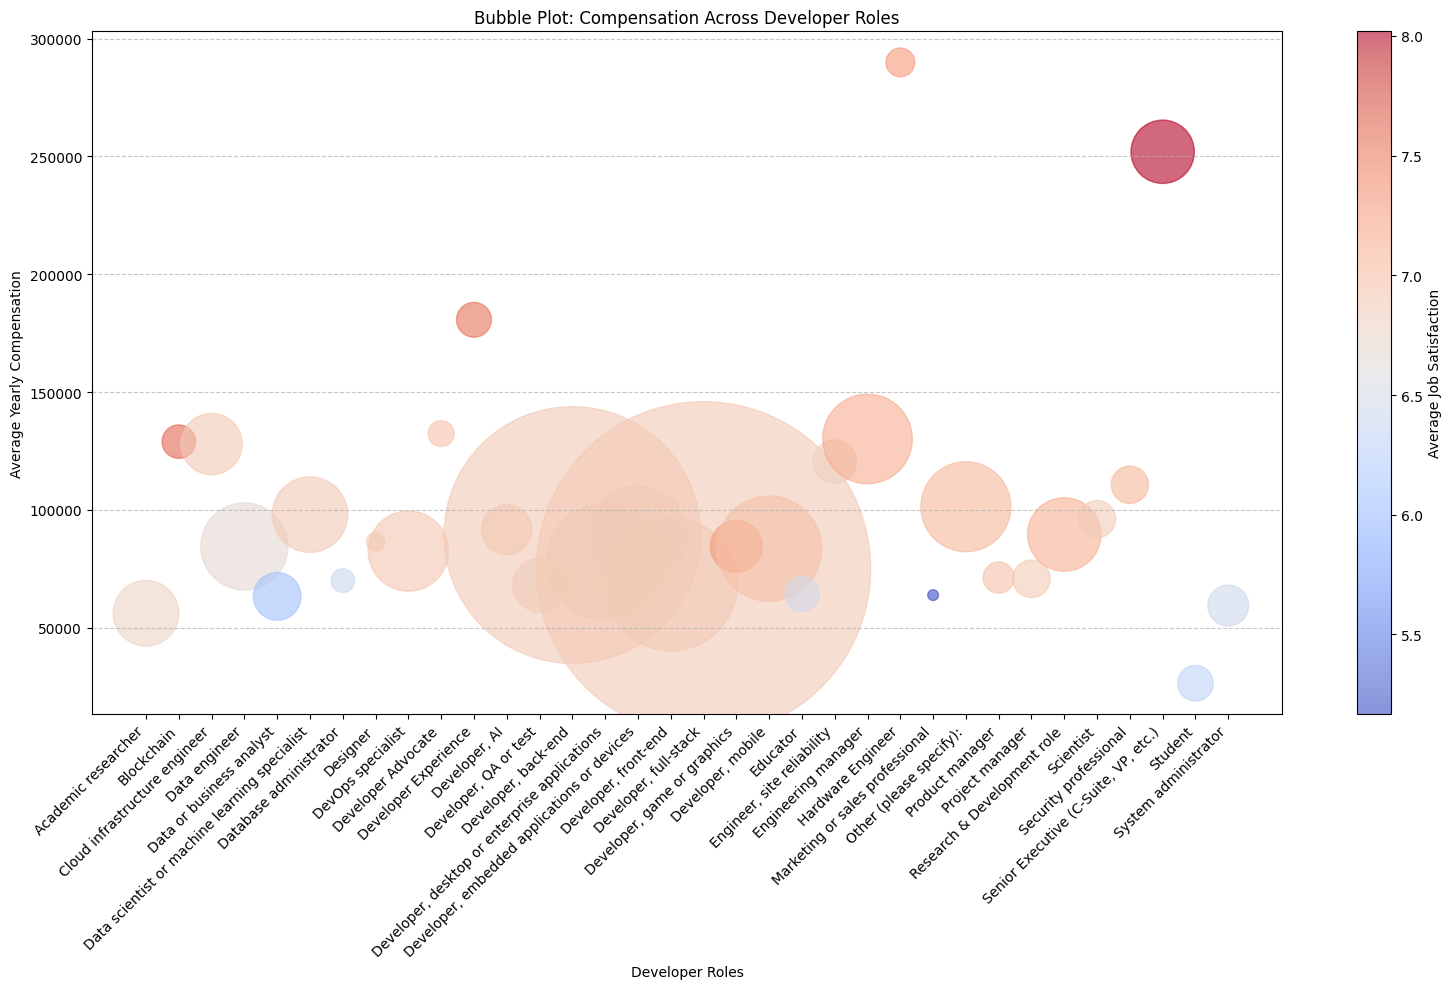

In [20]:
##Write your code here

# Query the data
query = """
SELECT DevType, ConvertedCompYearly, JobSat
FROM main
WHERE DevType IS NOT NULL AND ConvertedCompYearly IS NOT NULL AND JobSat IS NOT NULL
"""
df = pd.read_sql_query(query, conn)


# Split 'DevType' into individual roles and expand the DataFrame
df_expanded = df.assign(DevType=df['DevType'].str.split(';')).explode('DevType')

# Group the data by DevType
grouped = df_expanded.groupby('DevType').agg(
    AvgComp=('ConvertedCompYearly', 'mean'),
    AvgJobSat=('JobSat', 'mean'),
    Respondents=('DevType', 'count')
).reset_index()

# Create the bubble plot
plt.figure(figsize=(16, 10))

bubble = plt.scatter(
    x=grouped['DevType'],
    y=grouped['AvgComp'],
    s=grouped['Respondents'] * 10,  # Bubble size scaled by number of respondents
    alpha=0.6,
    c=grouped['AvgJobSat'],  # Color by average job satisfaction
    cmap='coolwarm'
)

# Add a color bar
plt.colorbar(bubble, label='Average Job Satisfaction')

# Customize plot
plt.title('Bubble Plot: Compensation Across Developer Roles')
plt.xlabel('Developer Roles')
plt.ylabel('Average Yearly Compensation')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to avoid clipping
plt.tight_layout()

# Show plot
plt.show()


#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


In [26]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 114.7 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 MB 66.2 MB/s eta 0:00:00:00:0100:01


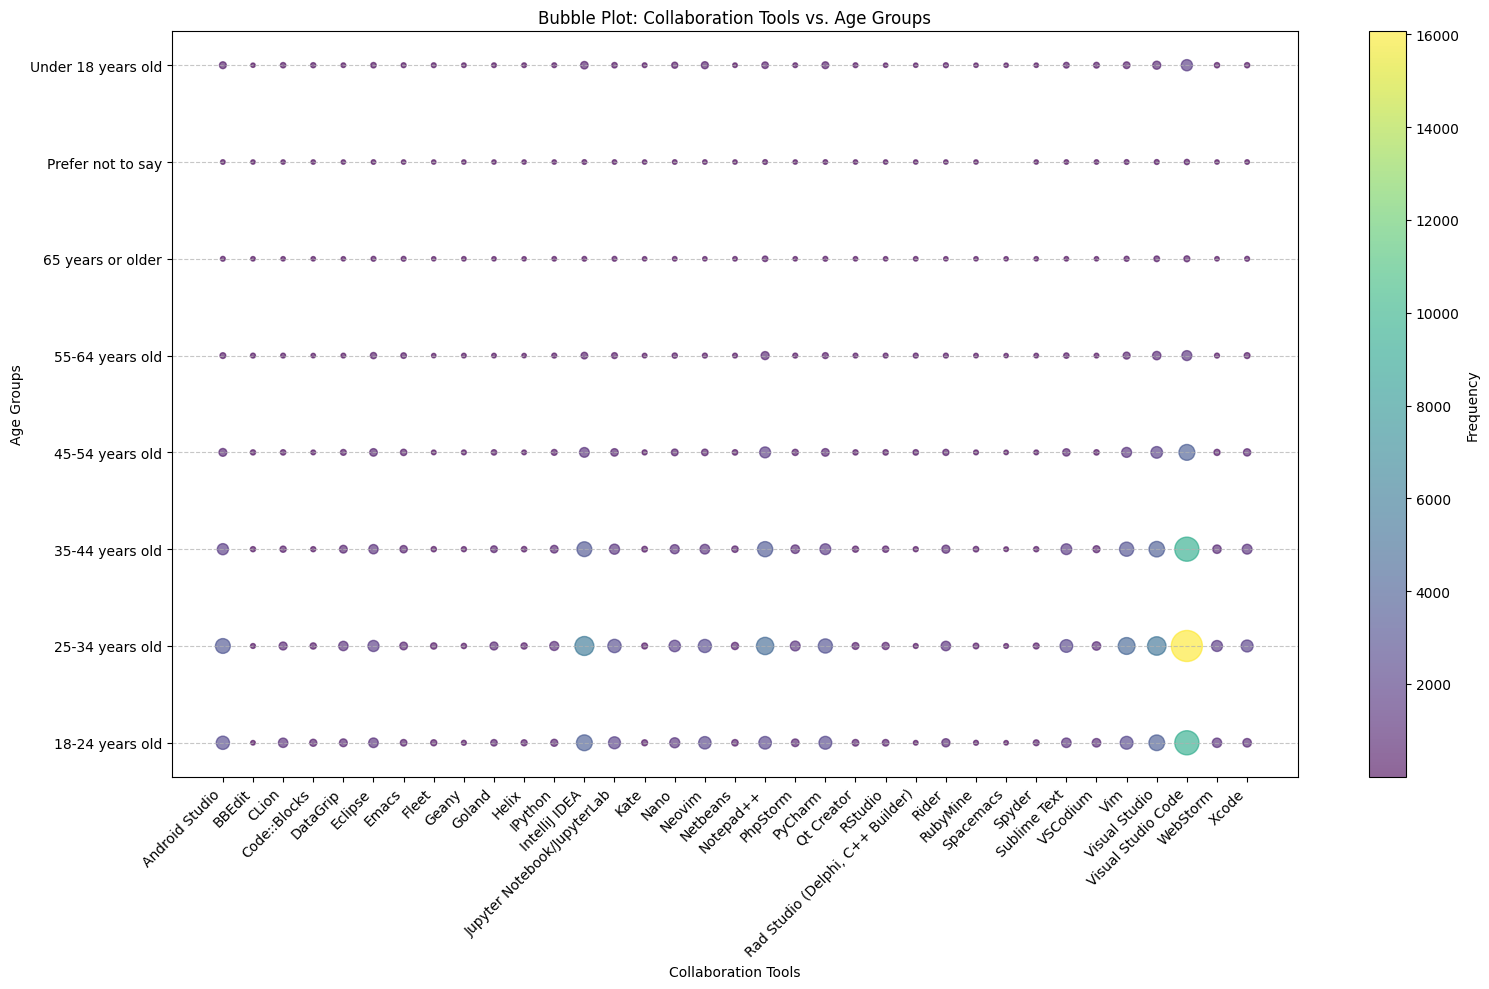

In [28]:
##Write your code here

from sklearn.preprocessing import MinMaxScaler
# Query the data
query = """
SELECT NEWCollabToolsHaveWorkedWith, Age
FROM main
WHERE NEWCollabToolsHaveWorkedWith IS NOT NULL AND Age IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Split 'NEWCollabToolsHaveWorkedWith' into individual tools and expand the DataFrame
df_expanded = df.assign(NEWCollabToolsHaveWorkedWith=df['NEWCollabToolsHaveWorkedWith'].str.split(';')).explode('NEWCollabToolsHaveWorkedWith')

# Group the data by Age and Collaboration Tools, and calculate frequency
grouped = df_expanded.groupby(['Age', 'NEWCollabToolsHaveWorkedWith']).size().reset_index(name='Frequency')

# Normalize the Frequency column
scaler = MinMaxScaler(feature_range=(10, 500))  # Adjust the range as needed for bubble sizes
grouped['NormalizedFrequency'] = scaler.fit_transform(grouped[['Frequency']])

# Create the bubble plot
plt.figure(figsize=(16, 10))

bubble = plt.scatter(
    x=grouped['NEWCollabToolsHaveWorkedWith'],
    y=grouped['Age'],
    s=grouped['NormalizedFrequency'],  # Use normalized frequency for bubble size
    alpha=0.6,
    c=grouped['Frequency'],  # Color by original frequency
    cmap='viridis'
)

# Add a color bar
plt.colorbar(bubble, label='Frequency')

# Customize plot
plt.title('Bubble Plot: Collaboration Tools vs. Age Groups')
plt.xlabel('Collaboration Tools')
plt.ylabel('Age Groups')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to avoid clipping
plt.tight_layout()

# Show plot
plt.show()


### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



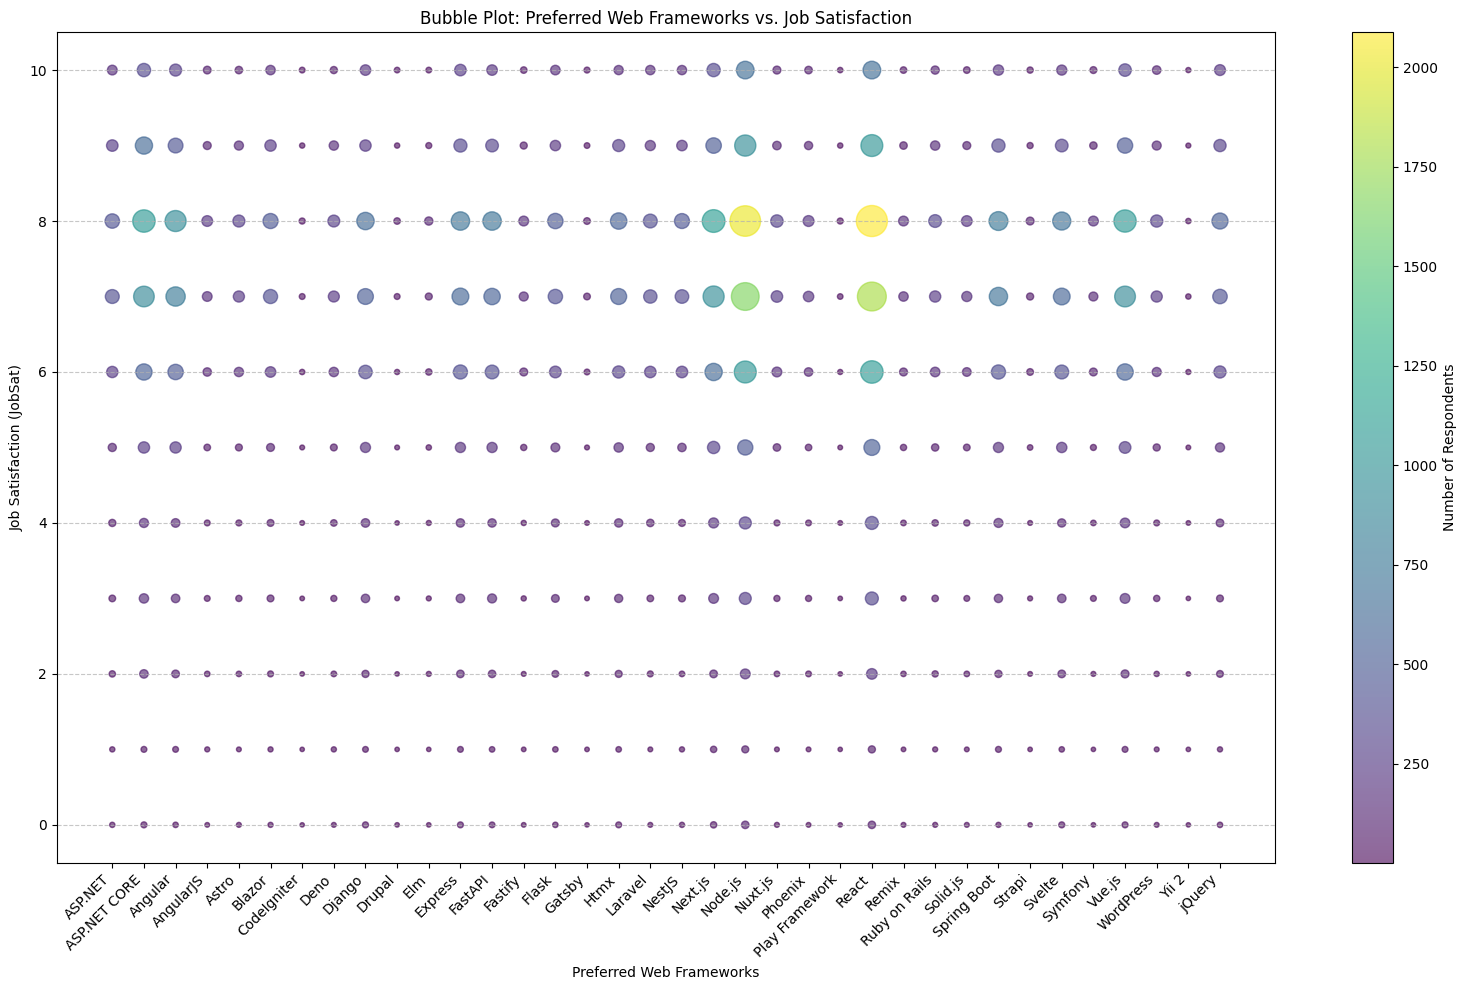

In [29]:
##Write your code here

# Query the data
query = """
SELECT WebframeWantToWorkWith, JobSat
FROM main
WHERE WebframeWantToWorkWith IS NOT NULL AND JobSat IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Split 'WebframeWantToWorkWith' into individual frameworks and expand the DataFrame
df_expanded = df.assign(WebframeWantToWorkWith=df['WebframeWantToWorkWith'].str.split(';')).explode('WebframeWantToWorkWith')

# Group the data by Web Framework and Job Satisfaction, and calculate frequencies
grouped = df_expanded.groupby(['WebframeWantToWorkWith', 'JobSat']).size().reset_index(name='Frequency')

# Normalize the Frequency column
scaler = MinMaxScaler(feature_range=(10, 500))  # Adjust the range for bubble sizes
grouped['NormalizedFrequency'] = scaler.fit_transform(grouped[['Frequency']])

# Create the bubble plot
plt.figure(figsize=(16, 10))

bubble = plt.scatter(
    x=grouped['WebframeWantToWorkWith'],
    y=grouped['JobSat'],
    s=grouped['NormalizedFrequency'],  # Use normalized frequency for bubble size
    alpha=0.6,
    c=grouped['Frequency'],  # Color by original frequency
    cmap='viridis'
)

# Add a color bar
plt.colorbar(bubble, label='Number of Respondents')

# Customize the plot
plt.title('Bubble Plot: Preferred Web Frameworks vs. Job Satisfaction')
plt.xlabel('Preferred Web Frameworks')
plt.ylabel('Job Satisfaction (JobSat)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()


#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



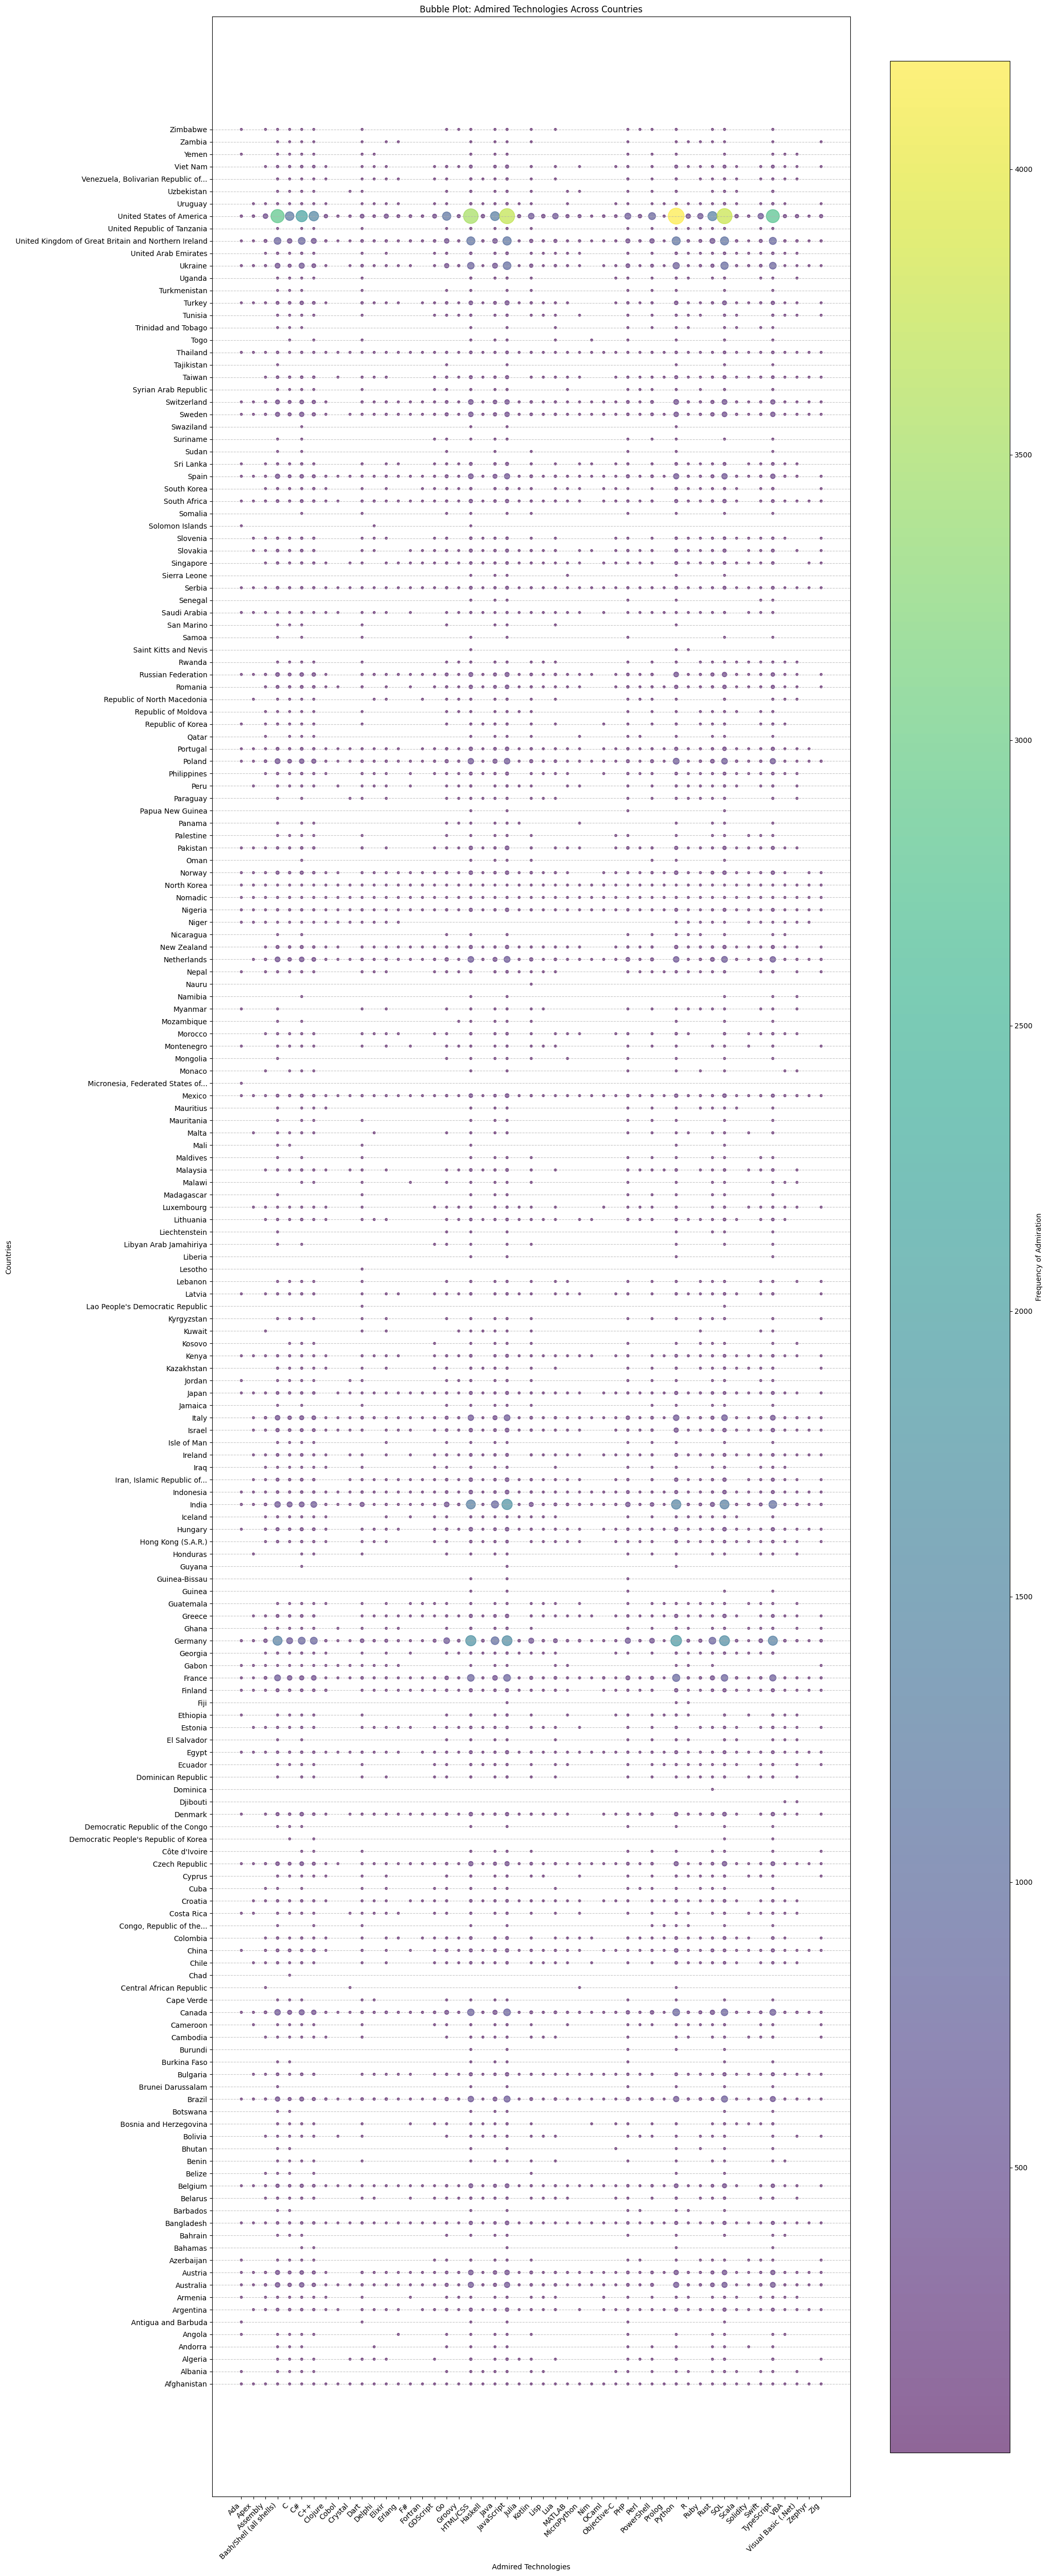

In [34]:
##Write your code here
# Query the data
query = """
SELECT Country, LanguageAdmired
FROM main
WHERE Country IS NOT NULL AND LanguageAdmired IS NOT NULL
"""
df = pd.read_sql_query(query, conn)


# Split 'LanguageAdmired' into individual technologies and expand the DataFrame
df_expanded = df.assign(LanguageAdmired=df['LanguageAdmired'].str.split(';')).explode('LanguageAdmired')

# Group the data by Country and LanguageAdmired, and calculate frequencies
grouped = df_expanded.groupby(['Country', 'LanguageAdmired']).size().reset_index(name='Frequency')

# Normalize the Frequency column
scaler = MinMaxScaler(feature_range=(10, 500))  # Adjust the range for bubble sizes
grouped['NormalizedFrequency'] = scaler.fit_transform(grouped[['Frequency']])

# Create the bubble plot
plt.figure(figsize=(20, 50))

bubble = plt.scatter(
    x=grouped['LanguageAdmired'],
    y=grouped['Country'],
    s=grouped['NormalizedFrequency'],  # Use normalized frequency for bubble size
    alpha=0.6,
    c=grouped['Frequency'],  # Color by original frequency
    cmap='viridis'
)

# Add a color bar
plt.colorbar(bubble, label='Frequency of Admiration')

# Customize the plot
plt.title('Bubble Plot: Admired Technologies Across Countries')
plt.xlabel('Admired Technologies')
plt.ylabel('Countries')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()


In [35]:
conn.close()

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
